# Artificial Neural Network (ANN)

<center><img src="https://www.mpg.de/20827416/original-1694424748.jpg?t=eyJ3aWR0aCI6ODQ4LCJmaWxlX2V4dGVuc2lvbiI6ImpwZyIsIm9ial9pZCI6MjA4Mjc0MTZ9--a8f75f0eae6637b7ddf50eb10953dbb23a2a7c0b" alt="Drawing" style="width: 600px; height: 300px;" /></center>

<div style="text-align: right"> 
  <small>www.mpg.de</small>
</div>

# Learning Objectives

1. [What are ANN's?](#What-are-ANN's?)
2. [Implementing a simple ANN in Python](#Implementing-a-simple-ANN-in-Python)
3. [ANN libraries such as TensorFlow, Keras, PyTorch](#ANN-libraries-such-as-TensorFlow,-Keras,-PyTorch)
4. [Regression with ANN](#Regression-with-ANN)
5. [Classification with ANN](#Classification-with-ANN)


## What are ANN's?

Artificial Neural Networks (ANNs) are computational models inspired by the human brain's structure and function. They are meant to mimic the function of a human brain to perform tasks. The building blocks are neurons with a close resemblance to the human brain. They are designed to recognize patterns and interpret sensory data through a kind of machine perception.



<center><img src="https://media.geeksforgeeks.org/wp-content/uploads/20230410104038/Artificial-Neural-Networks.webp" alt="Drawing" style="width: 400px; height: 200px;" /></center>

<div style="text-align: right"> 
  <small>geeksforgeek</small>
</div>







#### A typical neural network consists of three types of layers:



<center><img src="https://miro.medium.com/v2/resize:fit:1199/1*N8UXaiUKWurFLdmEhEHiWg.jpeg" alt="Drawing" style="width: 550px; height: 250px;" /></center>

<div style="text-align: right"> 
  <small>miro.medium.com</small>
</div>




**Input Layer**: This is where the data enters the network. Each node in this layer represents a feature in the input data.

**Hidden Layers**: These layers perform computations on the input data. They can be one or more in number. Each node in a hidden layer is connected to all the nodes in the previous layer and the next layer.

**Output Layer**: This layer produces the result of the neural network. The number of nodes in this layer depends on the problem the network is trying to solve. For example, in a binary classification problem, there would be one node in the output layer.

*The basic equation for a neural network can be represented as follows:*


$$y = f\left(\sum_{i=1}^{n} w_i \cdot x_i + b\right)$$

Where:

$y$ is the output of the neural network.

$f$ is the activation function applied to the weighted sum of inputs.

$\sum_{i=1}^{n} w_i \cdot x_i$ is the weighted sum of inputs, where $w_i$ are the weights and $x_i$ are the input values.
$b$ is the bias term.




## Implementing a simple ANN in Python

We will implement a simple neural network with NumPy only and train it with gradient descent to perform a simple linear regression on a dummy dataset.We will use the equation mentioned in the previous section.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate some random data for demonstration
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


Text(0, 0.5, 'Y')

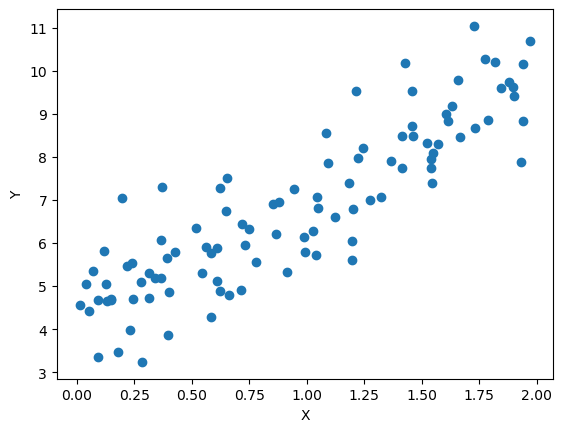

In [3]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("Y")

##### Training the model

In [4]:

# Define the neural network architecture
input_size = 1
output_size = 1
learning_rate = 0.001
epochs = 200

errors = []

# Initialize weights and biases
weights = np.random.randn(input_size, output_size)
bias = np.zeros((1, output_size))

# Training the neural network
for epoch in range(epochs):
    # Forward pass
    y_pred = np.dot(X, weights) + bias
    
    # Compute the loss (mean squared error)
    loss = np.mean((y_pred - y)**2)
    errors.append(loss)
    
    # Backward pass (gradient descent)
    grad_weights = 2*np.dot(X.T, (y_pred - y))
    grad_bias = 2*np.sum(y_pred - y)
    
    # Update weights and biases
    weights -= learning_rate * grad_weights
    bias -= learning_rate * grad_bias

# Print the final weights and bias
print("Final Weights:", weights)
print("Final Bias:", bias)


Final Weights: [[2.77099812]]
Final Bias: [[4.21409413]]


Text(0.5, 0, 'epochs')

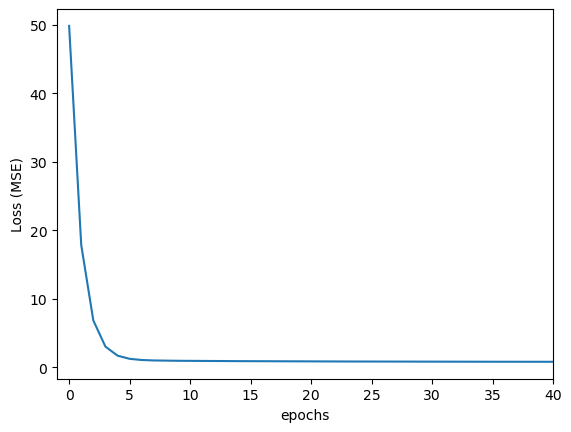

In [5]:
plt.plot(list(range(epochs)),errors)
plt.xlim(-1,40)
plt.ylabel("Loss (MSE)")
plt.xlabel("epochs")

##### Prediction

In [6]:
X_test = 2 * np.random.rand(1000, 1)

y_pred = np.dot(X_test, weights) + bias

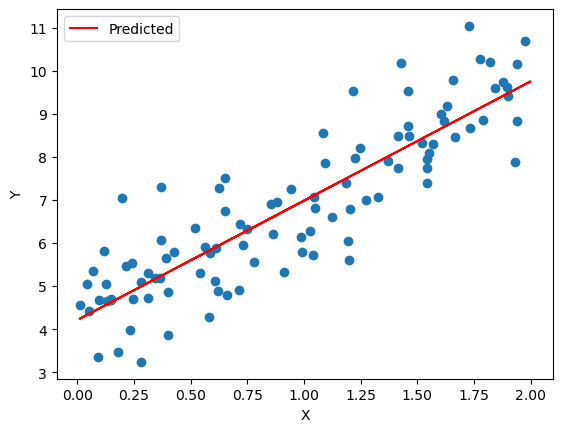

In [7]:
plt.scatter(X,y)
plt.plot(X_test,y_pred,label="Predicted",color='r')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

## ANN libraries such as TensorFlow, Keras, PyTorch

Several powerful libraries facilitate the implementation and training of ANNs. You do not need to write thousands of lines of code, unlike the previous example, to implement a deep learning network. They have everything written in a nice form of libraries. Here are three widely-used libraries:


1. **TensorFlow:**
   - Developed by Google Brain.
   - Offers a comprehensive ecosystem for machine learning and deep learning.
   - Allows building and training various neural network architectures.
   - [Documentation](https://www.tensorflow.org/)

2. **Keras:**
   - High-level neural networks API.
   - Now integrated into TensorFlow.
   - Designed for fast experimentation and prototyping of neural networks.
   - [Documentation](https://keras.io/)

3. **PyTorch:**
   - Developed by Facebook's AI Research lab (FAIR).
   - Known for its dynamic computational graph, making it more intuitive.
   - Gaining popularity for research and development in deep learning.
   - [Documentation](https://pytorch.org/)

These libraries provide a wealth of tools, making it easier for researchers and developers to work with neural networks, from simple to complex architectures.


## Regression with ANN



We will use PyTorch for building our model, and the regression will be performed on a materials dataset to predict its bandgap. The two useful PyTorch modules are `torch.nn` (for building the network) [documentation](https://pytorch.org/docs/stable/generated/torch.nn.Module.html) and `torch.optim` (which includes optimizers such as gradient descent) [documentation](https://pytorch.org/docs/stable/optim.html).





In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

##### Load the dataset

In [11]:
import numpy as np
import pandas as pd

data =  pd.read_csv('band_Gap.csv')

data.head(5)

,Number,MendeleevNumber,AtomicWeight,MeltingT,Column,Row,CovalentRadius,Electronegativity,NsValence,NpValence,...,NsUnfilled,NpUnfilled,NdUnfilled,NfUnfilled,NUnfilled,GSvolume_pa,GSbandgap,GSmagmom,SpaceGroupNumber,band_gap
0,2.500000,89.500000,4.257630,26.270000,4.500000,1.250000,41.000000,2.410000,1.250000,0.750000,...,0.750000,0.750000,0.0,0.0,1.500000,8.653437,7.499000,0.0,194.000000,4.3412
1,10.000000,82.375000,20.369348,158.393750,15.000000,2.375000,84.500000,2.721250,2.000000,3.000000,...,0.000000,3.000000,0.0,0.0,3.000000,17.694308,4.632500,0.0,122.000000,3.5600
2,6.000000,61.750000,12.240275,160.710000,11.500000,2.000000,85.250000,2.525000,1.750000,2.250000,...,0.250000,2.250000,0.0,0.0,2.500000,15.224896,4.827750,0.0,202.750000,3.6643
3,9.333333,60.666667,18.701880,135.113333,6.000000,2.333333,100.000000,2.153333,1.333333,1.333333,...,0.666667,0.666667,0.0,0.0,1.333333,29.608889,2.617667,0.0,145.000000,3.6839
4,10.000000,84.000000,20.326621,145.050000,15.333333,2.333333,81.333333,2.890000,2.000000,3.333333,...,0.000000,2.666667,0.0,0.0,2.666667,15.481329,2.687333,0.0,69.333333,5.1829


In [12]:
X = data.iloc[:,:-1].values
y = data.iloc[:,[-1]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


scaler_y = MinMaxScaler()

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled  = scaler_y.transform(y_test)

##### Convert data to PyTorch tensors

In [14]:

X_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)


##### Define a neural network with hidden layers

In [15]:

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

##### Instantiate the model, define loss function, and optimizer

In [16]:

input_size = X_tensor.shape[1]
hidden_size = X_tensor.shape[1]*4  # Adjust the size of the hidden layer as needed
output_size = 1
model = NeuralNetwork(input_size, hidden_size, output_size)
criterion = nn.MSELoss() # Mean square error loss
optimizer = optim.SGD(model.parameters(), lr=0.01) #Stochastic gradient descent

In [17]:
total_params = sum(p.numel() for p in model.parameters())
print(f'Total Parameters: {total_params}')

Total Parameters: 2113


##### Training the model

In [18]:

num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    
    mse = mean_squared_error((y_train),scaler_y.inverse_transform(outputs.detach().numpy()))

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss at every 100 epochs
    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], mse: {mse:.4f}')

Epoch [500/10000], mse: 0.7217
Epoch [1000/10000], mse: 0.6239
Epoch [1500/10000], mse: 0.5738
Epoch [2000/10000], mse: 0.5352
Epoch [2500/10000], mse: 0.5074
Epoch [3000/10000], mse: 0.4852
Epoch [3500/10000], mse: 0.4664
Epoch [4000/10000], mse: 0.4499
Epoch [4500/10000], mse: 0.4346
Epoch [5000/10000], mse: 0.4209
Epoch [5500/10000], mse: 0.4084
Epoch [6000/10000], mse: 0.3970
Epoch [6500/10000], mse: 0.3864
Epoch [7000/10000], mse: 0.3769
Epoch [7500/10000], mse: 0.3682
Epoch [8000/10000], mse: 0.3601
Epoch [8500/10000], mse: 0.3525
Epoch [9000/10000], mse: 0.3454
Epoch [9500/10000], mse: 0.3388
Epoch [10000/10000], mse: 0.3325


##### Plot the results of prediction

In [19]:
X_tensor_pred = torch.tensor(X_test_scaled, dtype=torch.float32)


Text(0, 0.5, 'Predicted bandGap (eV)')

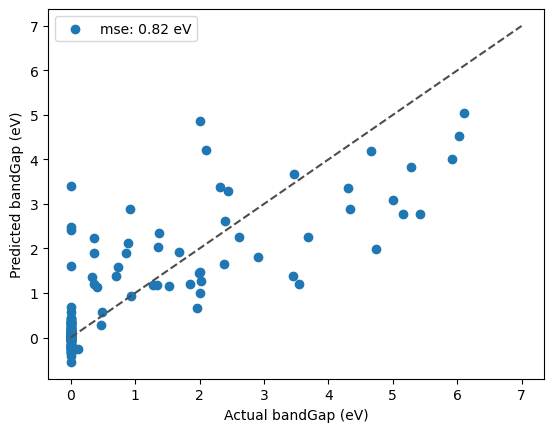

In [21]:
predicted = model(X_tensor_pred).detach().numpy()

mse = mean_squared_error((y_test),scaler_y.inverse_transform(predicted))
plt.scatter(scaler_y.inverse_transform(y_test_scaled),scaler_y.inverse_transform(predicted), label='mse: {} eV'.format(round(mse,2)))

plt.legend()
ax = plt.gca()
ax.plot([0, 7], [0, 7], ls="--", c=".3")

plt.xlabel("Actual bandGap (eV)")
plt.ylabel("Predicted bandGap (eV)")

## Classification with ANN



The task is to  classify materials in the Bandgap dataset as either metals or insulators/semiconductors.

- **Semiconductor**: A material with a small band gap, typically between 0.5 and 3 electronvolts (eV), allowing it to conduct electricity at higher temperatures than insulators but less effectively than metals.

- **Metal**: A material with no band gap or a very small one, allowing it to conduct electricity efficiently.

- **Insulator**: A material with a large band gap, typically exceeding 3 eV, making it a poor conductor of electricity.





Now let's determine which materials are metals and which ones are insulators or semiconductors

(array([355.,  33.,  25.,  17.,  15.,  13.,  13.,   4.,   2.,   2.]),
 array([0.     , 0.74631, 1.49262, 2.23893, 2.98524, 3.73155, 4.47786,
        5.22417, 5.97048, 6.71679, 7.4631 ]),
 <BarContainer object of 10 artists>)

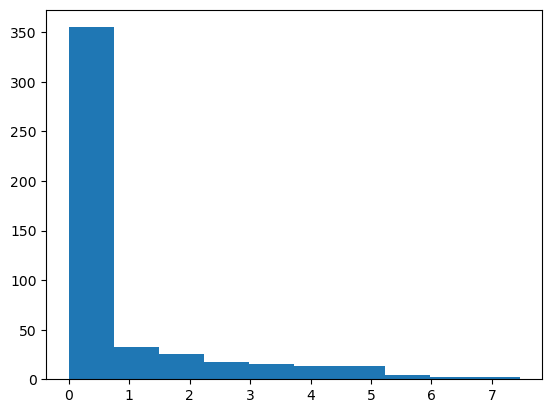

In [29]:
import matplotlib.pyplot as plt

plt.hist(data.band_gap)

In [30]:
metal_index = np.where(data.band_gap <0.5)[0].tolist()

semicond_index = np.where((0.5<data.band_gap)&(data.band_gap <3))[0].tolist()

len(metal_index),len(semicond_index)

(343, 87)

Since there is a significant difference in the size of the classes, we will attempt to reduce the imbalance by selecting a subset of the metals in the dataset

In [31]:
from random import shuffle

shuffle(metal_index)
metal_index_subset = metal_index[:90]

total_index = metal_index_subset+semicond_index

# Class labels

labels = np.empty(data.shape[0])
labels[ metal_index_subset] = 0
labels[semicond_index] = 1

In [32]:
data['labels'] = labels

#subset for classification
data_subset = data.iloc[total_index ,:]
data_subset = data_subset.sample(frac=1)
data_subset = data_subset.drop(columns=['band_gap'])
data_subset.head(5)

,Number,MendeleevNumber,AtomicWeight,MeltingT,Column,Row,CovalentRadius,Electronegativity,NsValence,NpValence,...,NsUnfilled,NpUnfilled,NdUnfilled,NfUnfilled,NUnfilled,GSvolume_pa,GSbandgap,GSmagmom,SpaceGroupNumber,labels
17,30.285714,81.000000,72.856729,270.414286,14.714286,3.285714,97.285714,2.860000,2.00,3.428571,...,0.00,2.142857,0.000000,0.0,2.142857,17.965357,0.0,0.000000,27.214286,1.0
83,18.000000,76.454545,39.881891,539.821818,13.272727,2.909091,96.000000,2.792727,2.00,2.545455,...,0.00,1.272727,1.272727,0.0,2.545455,11.704091,0.0,0.000000,84.545455,1.0
171,16.500000,62.250000,35.125178,820.342500,11.500000,3.000000,108.500000,2.535000,1.75,2.000000,...,0.25,1.000000,2.250000,0.0,3.500000,12.878750,0.0,0.000002,110.750000,1.0
229,66.250000,56.250000,162.887152,1093.185000,9.750000,5.750000,154.500000,2.035000,1.50,0.500000,...,0.50,1.000000,2.250000,0.0,3.750000,25.895625,0.0,0.000000,196.250000,0.0
178,56.000000,38.750000,139.358075,803.672500,5.000000,5.000000,161.750000,1.280000,1.75,0.250000,...,0.25,1.250000,0.000000,0.0,1.500000,27.935833,0.0,0.000000,218.250000,0.0


(array([90.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 87.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

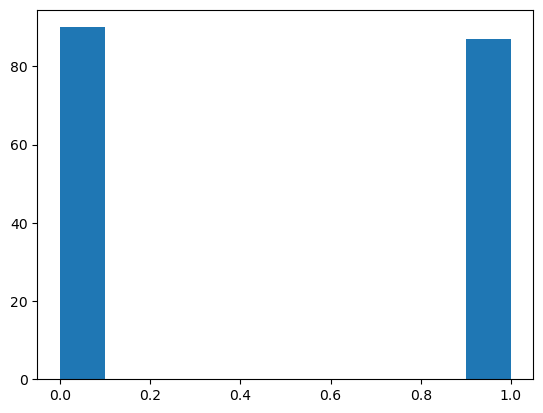

In [33]:
plt.hist(data_subset.labels)

#### The model

In [42]:
# Define a simple neural network class
class NeuralNetworkC(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetworkC, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

#### Dataset for training

In [43]:
X = data_subset.iloc[:,:-1].values
y = data_subset.iloc[:,[-1]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [45]:

X_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_train, dtype=torch.float32)


##### Instantiate the model, define loss function, and optimizer

In [76]:

input_size = X_tensor.shape[1]
hidden_size = X_tensor.shape[1]*2  # Adjust the size of the hidden layer as needed
output_size = 1
model = NeuralNetworkC(input_size, hidden_size, output_size)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01) #Stochastic gradient descent

In [77]:
total_params = sum(p.numel() for p in model.parameters())
print(f'Total Parameters: {total_params}')

Total Parameters: 1057


##### Training the model

In [78]:
from sklearn.metrics import accuracy_score

num_epochs = 5000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss at every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], loss: {loss:.10f}')

Epoch [100/5000], loss: 0.6763874888
Epoch [200/5000], loss: 0.6580916047
Epoch [300/5000], loss: 0.6366893649
Epoch [400/5000], loss: 0.6124784350
Epoch [500/5000], loss: 0.5854018331
Epoch [600/5000], loss: 0.5557264686
Epoch [700/5000], loss: 0.5247167349
Epoch [800/5000], loss: 0.4936543703
Epoch [900/5000], loss: 0.4638861418
Epoch [1000/5000], loss: 0.4365395606
Epoch [1100/5000], loss: 0.4121752977
Epoch [1200/5000], loss: 0.3909009993
Epoch [1300/5000], loss: 0.3726054132
Epoch [1400/5000], loss: 0.3569768369
Epoch [1500/5000], loss: 0.3436324894
Epoch [1600/5000], loss: 0.3321922123
Epoch [1700/5000], loss: 0.3223483860
Epoch [1800/5000], loss: 0.3138306737
Epoch [1900/5000], loss: 0.3064123094
Epoch [2000/5000], loss: 0.2999023795
Epoch [2100/5000], loss: 0.2941699326
Epoch [2200/5000], loss: 0.2890935838
Epoch [2300/5000], loss: 0.2845681608
Epoch [2400/5000], loss: 0.2805089056
Epoch [2500/5000], loss: 0.2768532038
Epoch [2600/5000], loss: 0.2735424936
Epoch [2700/5000], lo

##### Plot the results of prediction

In [85]:
X_tensor_pred = torch.tensor(X_test_scaled, dtype=torch.float32)


In [88]:
predicted = model(X_tensor_pred).detach().numpy()

predicted[predicted<0.5] = 0
predicted[predicted>=0.5] = 1


print("The prediction accuracy for classification",accuracy_score(predicted,y_test))

The prediction accuracy for classification 0.9259259259259259
